In [7]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Inputs
BMI = ctrl.Antecedent(np.linspace(0 ,40, 1000), 'BMI')
ACT = ctrl.Antecedent(np.linspace(1.3 ,2.1,1000), 'ACTIVITY')

# Output 
kcal = ctrl.Consequent(np.linspace(0 ,5000 ,1000), 'CAL')

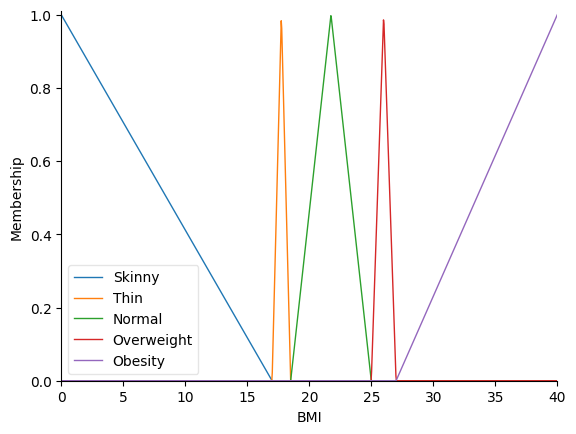

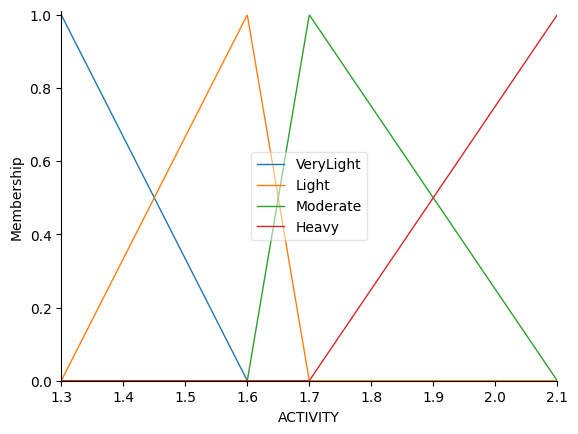

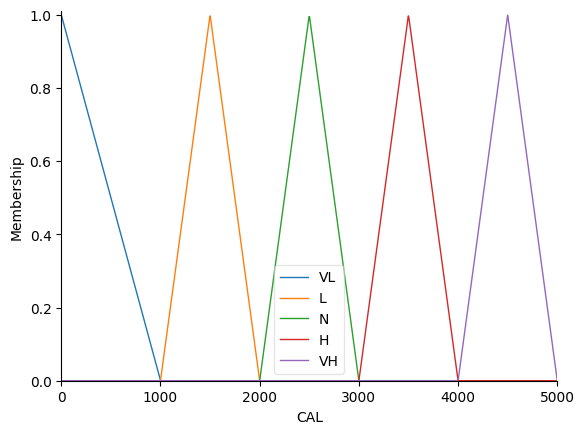

In [9]:
BMI['Skinny']     = fuzz.trimf(BMI.universe,[   0,     0, 17  ]) 
BMI['Thin']       = fuzz.trimf(BMI.universe,[  17, 17.75, 18.5]) 
BMI['Normal']     = fuzz.trimf(BMI.universe,[18.5, 21.75, 25  ]) 
BMI['Overweight'] = fuzz.trimf(BMI.universe,[  25,    26, 27  ]) 
BMI['Obesity']    = fuzz.trimf(BMI.universe,[  27,    40, 40  ]) 
BMI.view()

ACT['VeryLight'] = fuzz.trimf(ACT.universe,[1.3, 1.3, 1.6]) 
ACT['Light']     = fuzz.trimf(ACT.universe,[1.3, 1.6, 1.7]) 
ACT['Moderate']  = fuzz.trimf(ACT.universe,[1.6, 1.7, 2.1])
ACT['Heavy']     = fuzz.trimf(ACT.universe,[1.7, 2.1, 2.1])
ACT.view() 

kcal['VL'] = fuzz.trimf(kcal.universe,[0   ,    0, 1000]) 
kcal['L']  = fuzz.trimf(kcal.universe,[1000, 1500, 2000]) 
kcal['N']  = fuzz.trimf(kcal.universe,[2000, 2500, 3000])
kcal['H']  = fuzz.trimf(kcal.universe,[3000, 3500, 4000])
kcal['VH'] = fuzz.trimf(kcal.universe,[4000, 4500, 5000])
kcal.view()


In [10]:
rule = []

rule.append(ctrl.Rule(BMI['Skinny'], kcal['VH']))

rule.append(ctrl.Rule(BMI['Thin'] & ACT['VeryLight'], kcal['H']))
rule.append(ctrl.Rule(BMI['Thin'] & ACT['Light']    , kcal['H']))
rule.append(ctrl.Rule(BMI['Thin'] & ACT['Moderate'] , kcal['VH']))
rule.append(ctrl.Rule(BMI['Thin'] & ACT['Heavy']    , kcal['VH']))

rule.append(ctrl.Rule(BMI['Normal'] & ACT['VeryLight'], kcal['N']))
rule.append(ctrl.Rule(BMI['Normal'] & ACT['Light']    , kcal['N']))
rule.append(ctrl.Rule(BMI['Normal'] & ACT['Moderate'] , kcal['H']))
rule.append(ctrl.Rule(BMI['Normal'] & ACT['Heavy']    , kcal['H']))

rule.append(ctrl.Rule(BMI['Overweight'] & ACT['VeryLight'], kcal['L']))
rule.append(ctrl.Rule(BMI['Overweight'] & ACT['Light']    , kcal['L']))
rule.append(ctrl.Rule(BMI['Overweight'] & ACT['Moderate'] , kcal['L']))
rule.append(ctrl.Rule(BMI['Overweight'] & ACT['Heavy']    , kcal['N']))

rule.append(ctrl.Rule(BMI['Obesity'] & ACT['VeryLight'], kcal['L']))
rule.append(ctrl.Rule(BMI['Obesity'] & ACT['Light']    , kcal['VL']))
rule.append(ctrl.Rule(BMI['Obesity'] & ACT['Moderate'] , kcal['VL']))
rule.append(ctrl.Rule(BMI['Obesity'] & ACT['Heavy']    , kcal['VL']))


In [11]:
#Control system
kcal_control = ctrl.ControlSystem(rule)
kcal_simulation = ctrl.ControlSystemSimulation(kcal_control)

972.4235443218308


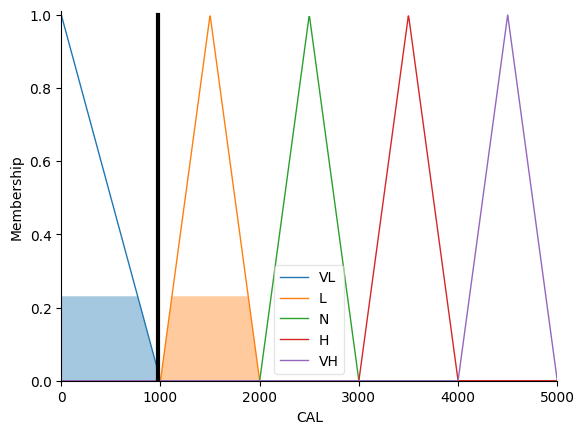

In [13]:
# Compute
kcal_simulation.input['BMI'] = 30
kcal_simulation.input['ACTIVITY'] = 1.4

kcal_simulation.compute()
print(kcal_simulation.output['CAL'])

# Kcal
kcal.view(sim = kcal_simulation)